# Interpreting Simulation Outputs: Making Decisions Based on Risk Ranges

This notebook demonstrates how to interpret simulation results and use them to make informed decisions.

Understanding this is critical because:
- Simulation gives you ranges, not just single numbers
- You need to interpret what those ranges mean for decision-making
- Different recommendations have different risk profiles
- Your risk tolerance determines which recommendation to choose


## Key Concepts

**Interpreting Simulation Results**:
- Look at the full range, not just the average
- Consider worst-case scenarios
- Understand probabilities (e.g., 20% chance of exceeding budget)
- Compare risk profiles of different options

**Decision-Making with Ranges**:
- Risk-averse: Choose options with narrower ranges, higher worst cases
- Risk-tolerant: Choose options with wider ranges, higher best cases
- Consider your constraints (budget limits, service requirements)

**Critical insight**: The numbers don't tell you what to do - they tell you what could happen. You still need judgment to decide.


## Scenario: Choosing Between Staffing Plans

You have simulation results for three different staffing plans. Each has been tested under 1,000 scenarios. You need to choose which plan to implement.

**Your constraints**:
- Budget limit: $55,000 per month
- Must meet service requirements (cannot have too few staff)
- Prefer predictable costs


## Step 1: Install Required Packages (Colab)


In [1]:
# Install required packages (if needed in Colab)
%pip install numpy matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


## Step 3: Simulation Results for Three Plans

Here are the simulation results (already run - you're interpreting them):


In [3]:
# Simulate three different staffing plans
num_scenarios = 1000

# Plan A: Conservative (more staff, higher cost, more predictable)
plan_a_costs = np.random.normal(loc=52000, scale=2000, size=num_scenarios)
plan_a_costs = np.clip(plan_a_costs, 48000, 56000)

# Plan B: Moderate (balanced)
plan_b_costs = np.random.normal(loc=50000, scale=4000, size=num_scenarios)
plan_b_costs = np.clip(plan_b_costs, 42000, 58000)

# Plan C: Aggressive (fewer staff, lower cost, less predictable)
plan_c_costs = np.random.normal(loc=48000, scale=6000, size=num_scenarios)
plan_c_costs = np.clip(plan_c_costs, 38000, 62000)

print("SIMULATION RESULTS SUMMARY:")
print("=" * 60)
print(f"\nPlan A (Conservative):")
print(f"  Range: ${plan_a_costs.min():,.0f} to ${plan_a_costs.max():,.0f}")
print(f"  Average: ${plan_a_costs.mean():,.0f}")
print(f"  Std Dev: ${plan_a_costs.std():,.0f}")
print(f"\nPlan B (Moderate):")
print(f"  Range: ${plan_b_costs.min():,.0f} to ${plan_b_costs.max():,.0f}")
print(f"  Average: ${plan_b_costs.mean():,.0f}")
print(f"  Std Dev: ${plan_b_costs.std():,.0f}")
print(f"\nPlan C (Aggressive):")
print(f"  Range: ${plan_c_costs.min():,.0f} to ${plan_c_costs.max():,.0f}")
print(f"  Average: ${plan_c_costs.mean():,.0f}")
print(f"  Std Dev: ${plan_c_costs.std():,.0f}")


SIMULATION RESULTS SUMMARY:

Plan A (Conservative):
  Range: $48,000 to $56,000
  Average: $52,030
  Std Dev: $1,884

Plan B (Moderate):
  Range: $42,000 to $58,000
  Average: $50,282
  Std Dev: $3,813

Plan C (Aggressive):
  Range: $38,000 to $62,000
  Average: $48,112
  Std Dev: $5,584


## Step 4: Visualize and Analyze

Let's visualize the distributions and calculate risk metrics:


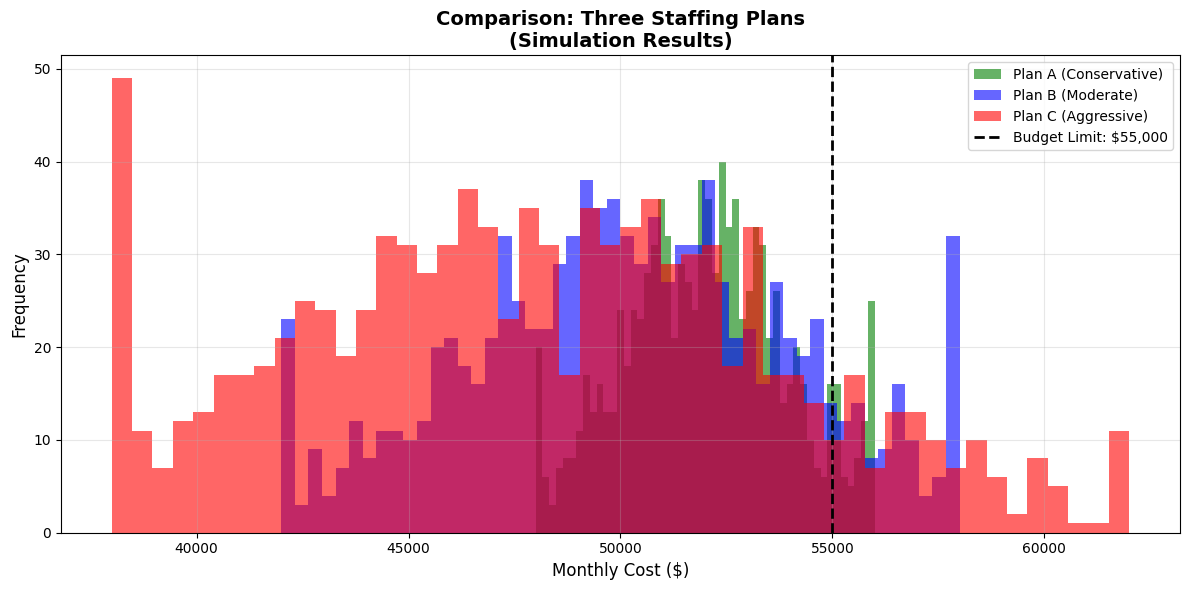


RISK ANALYSIS:

Plan A:
  Average: $52,030
  Range: $48,000 to $56,000
  Probability over budget: 7.5%

Plan B:
  Average: $50,282
  Range: $42,000 to $58,000
  Probability over budget: 11.4%

Plan C:
  Average: $48,112
  Range: $38,000 to $62,000
  Probability over budget: 11.9%

💡 DECISION GUIDANCE:
   Risk-averse → Plan A (narrower range, lower risk)
   Risk-tolerant → Plan C (lower average, but wider range)
   Balanced → Plan B (middle ground)


In [4]:
# Visualize and analyze
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(plan_a_costs, bins=50, alpha=0.6, label='Plan A (Conservative)', color='green')
ax.hist(plan_b_costs, bins=50, alpha=0.6, label='Plan B (Moderate)', color='blue')
ax.hist(plan_c_costs, bins=50, alpha=0.6, label='Plan C (Aggressive)', color='red')

budget_limit = 55000
ax.axvline(budget_limit, color='black', linestyle='--', linewidth=2, label=f'Budget Limit: ${budget_limit:,}')

ax.set_xlabel('Monthly Cost ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Comparison: Three Staffing Plans\n(Simulation Results)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate risk metrics
def analyze_plan(costs, name, budget):
    prob_over = (costs > budget).sum() / len(costs) * 100
    return {'Plan': name, 'Avg': costs.mean(), 'Worst': costs.min(), 'Best': costs.max(), 
            'Range': costs.max() - costs.min(), 'Prob Over Budget': prob_over}

results = pd.DataFrame([
    analyze_plan(plan_a_costs, 'Plan A', budget_limit),
    analyze_plan(plan_b_costs, 'Plan B', budget_limit),
    analyze_plan(plan_c_costs, 'Plan C', budget_limit)
])

print("\nRISK ANALYSIS:")
print("=" * 70)
for _, row in results.iterrows():
    print(f"\n{row['Plan']}:")
    print(f"  Average: ${row['Avg']:,.0f}")
    print(f"  Range: ${row['Worst']:,.0f} to ${row['Best']:,.0f}")
    print(f"  Probability over budget: {row['Prob Over Budget']:.1f}%")

print("\n💡 DECISION GUIDANCE:")
print("   Risk-averse → Plan A (narrower range, lower risk)")
print("   Risk-tolerant → Plan C (lower average, but wider range)")
print("   Balanced → Plan B (middle ground)")
